# Feature Selection for Image Features

### In this notebook, we explore several feature selection methods and feature analysis:
1. **$R^{2}$ correlations between features, pairwise**
2. **PCA**
3. **Univariate selection : SelectKBest**
4. **Feature importance**
5. **Recursive Feature Elimination**
6. **Forward Feature Selection**
7. **Backward Feature Selection**

In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(os.getcwd())

/home/mila/teaching/user09


In [3]:
path_to_images = "/home/mila/teaching/user09/new_data/Train/Image/"
path_to_profile = "/home/mila/teaching/user09/new_data/Train/Profile/"

sys.path.append(path_to_images)
sys.path.append(path_to_profile)
print(sys.path)

['/home/mila/teaching/user09', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python37.zip', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7/lib-dynload', '', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7/site-packages', '/home/mila/teaching/user09/.conda/envs/fb-env/lib/python3.7/site-packages/IPython/extensions', '/home/mila/teaching/user09/.ipython', '/home/mila/teaching/user09/new_data/Train/Image/', '/home/mila/teaching/user09/new_data/Train/Profile/']


In [12]:
image = pd.read_csv(path_to_images + "oxford.csv")
df = pd.read_csv(path_to_profile + "Profile.csv")
df

,Unnamed: 0,userid,age,gender,ope,con,ext,agr,neu
0,0,7267f43c71fcf53f4580fd3cd808bd48,26.0,0.0,4.00,2.25,2.20,3.60,2.80
1,1,e1cdac10d136e76e064e4860007d786d,24.0,0.0,4.20,3.35,2.45,3.90,2.60
2,2,ea4b8b534a35f59713f61f29b8725d09,27.0,1.0,2.75,4.80,3.15,3.85,4.15
3,3,c7bb07b4b9ccd28cd0bc285194da5c72,29.0,1.0,3.40,3.20,2.10,3.70,2.35
4,4,e8b8f7f4f40ea6babfa9a2a967ff1866,25.0,0.0,4.40,3.25,4.00,2.89,2.35
...,...,...,...,...,...,...,...,...,...
9495,9495,094f6c8f50a4783c2ad0ab18182d9e93,22.0,0.0,2.70,2.50,1.75,3.15,4.05
9496,9496,027081c27fe42c0ea3dac23604bcda8f,14.0,1.0,3.85,1.65,2.50,3.15,4.45
9497,9497,c6065e52c61187ed0db62ccee2654c6b,22.0,0.0,3.85,3.35,1.80,3.60,2.55
9498,9498,01c02aada76eec7f7d7939eab1b91671,21.0,1.0,3.60,3.40,3.15,3.90,2.80


#### Because the column "headPose_pitch" has only zero values, we can remove it

In [48]:
image = image.drop(columns="headPose_pitch")
image.head()

,userId,faceID,faceRectangle_width,faceRectangle_height,faceRectangle_left,faceRectangle_top,pupilLeft_x,pupilLeft_y,pupilRight_x,pupilRight_y,...,upperLipBottom_y,underLipTop_x,underLipTop_y,underLipBottom_x,underLipBottom_y,facialHair_mustache,facialHair_beard,facialHair_sideburns,headPose_roll,headPose_yaw
0,0000e06e07496624211632e8e264126c,f7e072db-8532-4686-9074-27e83fee5e94,61,61,15,49,32.7,64.7,59.7,65.0,...,94.0,41.8,94.3,41.9,98.6,0.0,0.0,0.0,3.9,-22.4
1,000235a2ba2f48231b7d24e1f08d7878,934b5179-acec-4dea-a348-feae87767c2d,83,83,91,95,114.4,117.6,154.5,121.0,...,155.2,130.5,164.5,130.1,169.6,0.1,0.0,0.0,5.2,-8.3
2,000235a2ba2f48231b7d24e1f08d7878,118c1f96-b32a-4021-a993-8f60e9859517,76,76,22,50,49.6,64.1,79.6,78.7,...,105.9,52.4,114.6,51.2,118.5,0.5,0.4,0.2,22.7,27.1
3,000c4b6e2468f7d528876fd1a6dffd4c,1eb367c8-9467-411f-9689-fd1affa95654,121,121,10,21,45.8,55.4,97.5,49.9,...,110.1,67.3,111.4,67.8,119.3,0.3,0.3,0.3,-1.3,-11.7
4,001494c3b74f124a2e3435fff17f376b,384ff8c2-efd3-4d34-a9c1-e0756fc0312c,115,115,0,29,41.1,55.6,91.1,72.9,...,111.3,46.6,116.6,45.9,120.1,0.0,0.0,0.0,19.3,1.1


In [49]:
print(len(image.columns))
print(image.columns)

65
Index(['userId', 'faceID', 'faceRectangle_width', 'faceRectangle_height',
       'faceRectangle_left', 'faceRectangle_top', 'pupilLeft_x', 'pupilLeft_y',
       'pupilRight_x', 'pupilRight_y', 'noseTip_x', 'noseTip_y', 'mouthLeft_x',
       'mouthLeft_y', 'mouthRight_x', 'mouthRight_y', 'eyebrowLeftOuter_x',
       'eyebrowLeftOuter_y', 'eyebrowLeftInner_x', 'eyebrowLeftInner_y',
       'eyeLeftOuter_x', 'eyeLeftOuter_y', 'eyeLeftTop_x', 'eyeLeftTop_y',
       'eyeLeftBottom_x', 'eyeLeftBottom_y', 'eyeLeftInner_x',
       'eyeLeftInner_y', 'eyebrowRightInner_x', 'eyebrowRightInner_y',
       'eyebrowRightOuter_x', 'eyebrowRightOuter_y', 'eyeRightInner_x',
       'eyeRightInner_y', 'eyeRightTop_x', 'eyeRightTop_y', 'eyeRightBottom_x',
       'eyeRightBottom_y', 'eyeRightOuter_x', 'eyeRightOuter_y',
       'noseRootLeft_x', 'noseRootLeft_y', 'noseRootRight_x',
       'noseRootRight_y', 'noseLeftAlarTop_x', 'noseLeftAlarTop_y',
       'noseRightAlarTop_x', 'noseRightAlarTop_y', 'noseLe

## 1. Analyzing correlations between variables

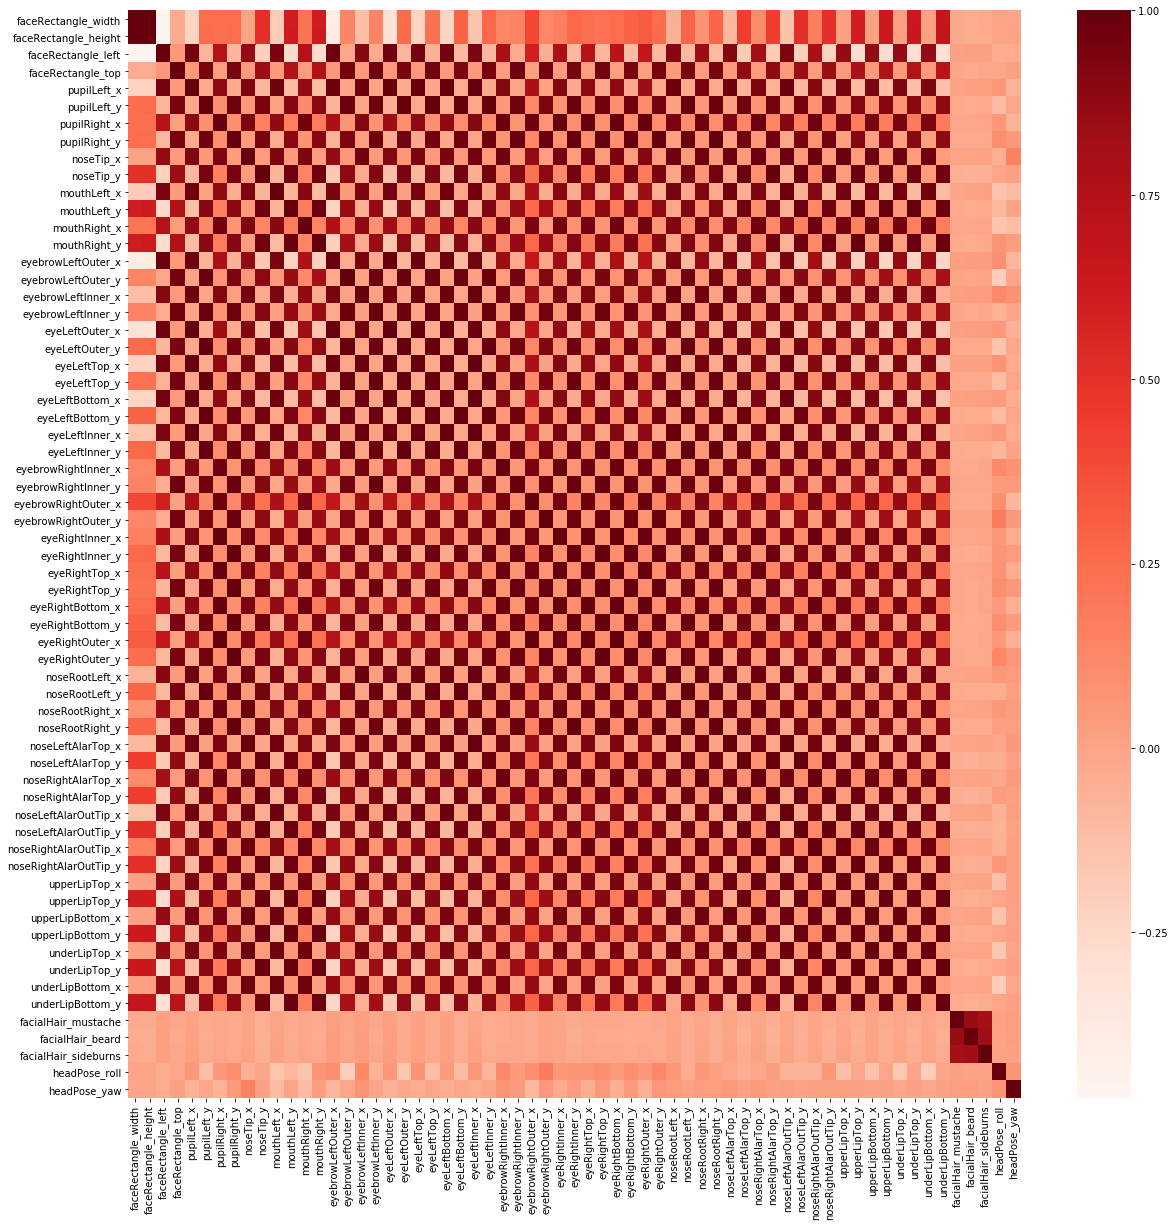

In [8]:
plt.figure(figsize=(20,20))
cor = image.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [9]:
for column in cor.columns:
    print(cor[column][(cor[column] > 0.8) & (cor[column] != 1)])

faceRectangle_height    0.997204
Name: faceRectangle_width, dtype: float64
faceRectangle_width    0.997204
Name: faceRectangle_height, dtype: float64
pupilLeft_x             0.957111
noseTip_x               0.856792
mouthLeft_x             0.941231
eyebrowLeftOuter_x      0.978891
eyebrowLeftInner_x      0.909127
eyeLeftOuter_x          0.974445
eyeLeftTop_x            0.956457
eyeLeftBottom_x         0.960687
eyeLeftInner_x          0.935614
noseRootLeft_x          0.897885
noseRootRight_x         0.833846
noseLeftAlarTop_x       0.915376
noseRightAlarTop_x      0.816572
noseLeftAlarOutTip_x    0.933867
upperLipTop_x           0.867242
upperLipBottom_x        0.866063
underLipTop_x           0.863873
underLipBottom_x        0.859896
Name: faceRectangle_left, dtype: float64
pupilLeft_y              0.949640
pupilRight_y             0.950483
noseTip_y                0.836275
eyebrowLeftOuter_y       0.954557
eyebrowLeftInner_y       0.974904
eyeLeftOuter_y           0.941584
eyeLeftTop_

## 2. Principal Component Analysis (PCA)

#### Assigning gender label to each sample in oxford dataset.

In [50]:
def extract_gender(df: pd.Series) -> int:
    return profile[profile["userid"] == df["userId"]]["gender"].item()

genders = [extract_gender(row[1]) for row in image.iterrows()]
image = image.assign(gender=genders)

In [51]:
image

,userId,faceID,faceRectangle_width,faceRectangle_height,faceRectangle_left,faceRectangle_top,pupilLeft_x,pupilLeft_y,pupilRight_x,pupilRight_y,...,underLipTop_x,underLipTop_y,underLipBottom_x,underLipBottom_y,facialHair_mustache,facialHair_beard,facialHair_sideburns,headPose_roll,headPose_yaw,gender
0,0000e06e07496624211632e8e264126c,f7e072db-8532-4686-9074-27e83fee5e94,61,61,15,49,32.7,64.7,59.7,65.0,...,41.8,94.3,41.9,98.6,0.0,0.0,0.0,3.9,-22.4,1.0
1,000235a2ba2f48231b7d24e1f08d7878,934b5179-acec-4dea-a348-feae87767c2d,83,83,91,95,114.4,117.6,154.5,121.0,...,130.5,164.5,130.1,169.6,0.1,0.0,0.0,5.2,-8.3,0.0
2,000235a2ba2f48231b7d24e1f08d7878,118c1f96-b32a-4021-a993-8f60e9859517,76,76,22,50,49.6,64.1,79.6,78.7,...,52.4,114.6,51.2,118.5,0.5,0.4,0.2,22.7,27.1,0.0
3,000c4b6e2468f7d528876fd1a6dffd4c,1eb367c8-9467-411f-9689-fd1affa95654,121,121,10,21,45.8,55.4,97.5,49.9,...,67.3,111.4,67.8,119.3,0.3,0.3,0.3,-1.3,-11.7,0.0
4,001494c3b74f124a2e3435fff17f376b,384ff8c2-efd3-4d34-a9c1-e0756fc0312c,115,115,0,29,41.1,55.6,91.1,72.9,...,46.6,116.6,45.9,120.1,0.0,0.0,0.0,19.3,1.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,ffabf17623fc308c4b3329e8944e7a6c,60ded1fa-6cac-4002-87f2-e4dc92fd6585,86,86,38,84,70.1,102.8,103.4,106.7,...,76.3,149.4,76.3,154.8,0.0,0.0,0.0,8.9,-37.2,1.0
7911,ffafdf80774c97cbc90e3d80e8794e57,72fe02ae-60c1-42fc-bef1-41ce23c8ce6b,55,55,81,15,95.8,28.8,120.4,29.4,...,110.6,58.9,110.6,61.3,0.2,0.0,0.0,-0.4,7.2,0.0
7912,ffb0a8b51dd1d644bcf3d85f42dcd7d7,e4c4d0ab-80b4-4c1e-8e11-f70cae1a67b3,157,138,26,61,74.7,98.6,137.7,104.7,...,102.7,184.0,101.7,194.2,0.2,0.2,0.1,5.3,-3.3,0.0
7913,ffb2830257138d30925a345f7c404d16,51a364d0-ca61-404f-914b-8f06299c6987,37,37,94,62,106.4,70.8,122.6,73.1,...,110.9,91.2,110.7,93.8,0.0,0.0,0.0,8.6,-27.0,0.0


#### Standardizing features using  `MinMaxScaler()` from sklearn. It normalizes data for each column individually.

In [52]:
from sklearn.preprocessing import MinMaxScaler

features = image.values[:, 2:-1]
features = MinMaxScaler().fit_transform(features)
targets = image.values[:, -1]

print(features)

[[0.15337423 0.13812155 0.09202454 ... 0.         0.58547009 0.29210276]
 [0.28834356 0.25966851 0.55828221 ... 0.         0.59935897 0.4262607 ]
 [0.24539877 0.22099448 0.13496933 ... 0.2        0.78632479 0.76308278]
 ...
 [0.74233129 0.56353591 0.1595092  ... 0.1        0.60042735 0.47383444]
 [0.00613497 0.00552486 0.57668712 ... 0.         0.63568376 0.24833492]
 [0.27607362 0.24861878 0.35582822 ... 0.4        0.43696581 0.68220742]]


#### 2 component PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

principal_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
final_df = pd.concat([principal_df, image["gender"]], axis = 1)
final_df

,principal_component_1,principal_component_2,gender
0,-1.638014,-0.212483,1.0
1,1.073630,0.885973,0.0
2,-1.073546,-0.029150,0.0
3,-0.913912,-0.206503,0.0
4,-1.197761,-0.026589,1.0
...,...,...,...
7910,-0.497639,0.719233,1.0
7911,0.265894,-1.074400,0.0
7912,0.241277,0.902083,0.0
7913,0.453431,-0.284134,0.0


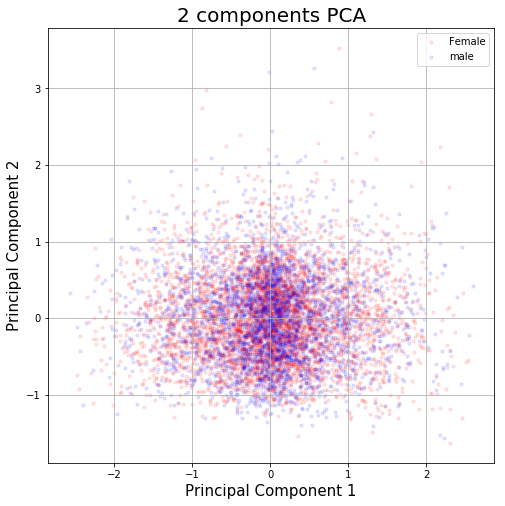

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = final_df['gender'] == target
    ax.scatter(final_df.loc[indices_to_keep, 'principal_component_1'],
               final_df.loc[indices_to_keep, 'principal_component_2'],
               c = color,
               alpha = 0.1,
               s = 10)

ax.legend(["Female", "male"])
ax.grid()

In [55]:
print("Proportion of variance explained for each component: {}".format(pca.explained_variance_ratio_))
print("Total propotion of variance explained for both components: {}".format(pca.explained_variance_ratio_.sum()))

Proportion of variance explained for each component: [0.50957538 0.29026895]
Total propotion of variance explained for both components: 0.7998443249218428


#### 3 components PCA

In [56]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 
                                                                    'principal_component_2',
                                                                    'principal_component_3'])
final_df = pd.concat([principal_df, image["gender"]], axis = 1)
final_df

,principal_component_1,principal_component_2,principal_component_3,gender
0,-1.638014,-0.212483,-0.034778,1.0
1,1.073630,0.885973,0.056274,0.0
2,-1.073546,-0.029150,0.385723,0.0
3,-0.913912,-0.206503,-0.118081,0.0
4,-1.197761,-0.026589,-0.407980,1.0
...,...,...,...,...
7910,-0.497639,0.719233,-0.029936,1.0
7911,0.265894,-1.074400,-0.058016,0.0
7912,0.241277,0.902083,-0.306535,0.0
7913,0.453431,-0.284134,0.146810,0.0


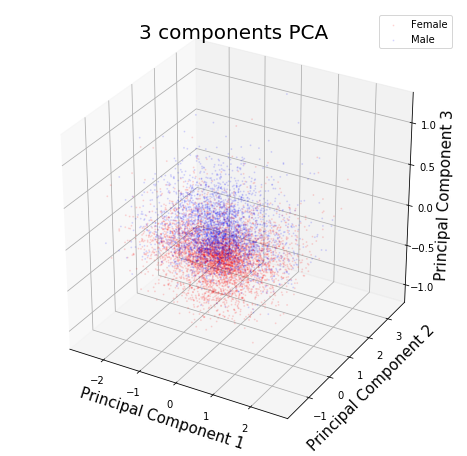

In [57]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 components PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = final_df['gender'] == target
    ax.scatter(final_df.loc[indices_to_keep, 'principal_component_1'],
               final_df.loc[indices_to_keep, 'principal_component_2'],
               final_df.loc[indices_to_keep, 'principal_component_3'],               
               c = color,
               alpha = 0.1,
               s = 1)
ax.legend(["Female", "Male"])
ax.grid()

In [58]:
print("Proportion of variance explained for each component: {}".format(pca.explained_variance_ratio_))
print("Total propotion of variance explained for all three components: {}".format(pca.explained_variance_ratio_.sum()))

Proportion of variance explained for each component: [0.50957538 0.29026895 0.07458005]
Total propotion of variance explained for all three components: 0.874424378723808


#### As we don't notice 2 clear separated clusters, features for women and men are not well separated. It is unsurprising that features for men and women overlap, as we share a lot of similar facial caracteristics and traits.

#### Let's try to find the number of components that explain approximately 100% of the variance.

In [59]:
def pca(nb_components, data):
    model = PCA(n_components=n_components)
    principal_components = model.fit_transform(data)
    
    columns = []
    for i in range(nb_components):
        column = "principal_component_" + str(i+1)
        columns.append(column)
    
    return model, principal_components, columns

n_components = 45
model, principal_components, columns = pca(n_components, features)

principal_df = pd.DataFrame(data = principal_components, columns = columns)
final_df = pd.concat([principal_df, image["gender"]], axis = 1)

In [60]:
print("Proportion of variance explained for each component: {}".format(model.explained_variance_ratio_))
print("Total propotion of variance explained for all three components: {}".format(model.explained_variance_ratio_.sum()))

Proportion of variance explained for each component: [5.09575378e-01 2.90268947e-01 7.45800538e-02 6.97464425e-02
 2.58363243e-02 1.67729738e-02 4.74052473e-03 4.35327809e-03
 9.04665892e-04 5.38087245e-04 4.68815569e-04 3.62607489e-04
 2.96990270e-04 2.62956206e-04 2.07291600e-04 1.36650947e-04
 1.19771462e-04 9.61177695e-05 8.51515062e-05 7.69260823e-05
 6.33793932e-05 5.50925986e-05 5.19591040e-05 3.82029047e-05
 3.55093844e-05 3.38294179e-05 3.27410660e-05 2.47676593e-05
 2.14596401e-05 1.99729695e-05 1.74787814e-05 1.58101873e-05
 1.54869810e-05 1.45531913e-05 1.20209879e-05 1.04207762e-05
 1.00421855e-05 9.59437485e-06 8.49728980e-06 7.95714140e-06
 7.21475370e-06 6.90282005e-06 6.46080453e-06 6.24784945e-06
 5.35528503e-06]
Total propotion of variance explained for all three components: 0.9999609117310463


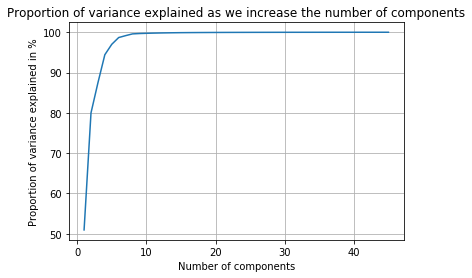

In [61]:
component = np.linspace(1, 45, 45)
explained_variance_ratio = np.cumsum(model.explained_variance_ratio_)
plt.grid()
plt.plot(component, explained_variance_ratio * 100)
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained in %")
plt.title("Proportion of variance explained as we increase the number of components")
plt.show()

#### After 10 components, we can explain the vast majority of the variance of X.

## 3. Univariate Selection : SelectKBest 

In [29]:
from sklearn.feature_selection import RFE, SelectKBest, chi2

#### Calculates the chi-squared statistic for each feature and ranks them in decreasing order of their statistic. A high statistic indicates that the feature and the targets are not independent and hence the feature can provide information the gender.  

In [40]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features, image["gender"])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(image.columns[2:-1])

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score') #print 10 best features

,Feature,Score
59,facialHair_beard,790.315948
58,facialHair_mustache,712.772793
60,facialHair_sideburns,577.982523
0,faceRectangle_width,13.883665
1,faceRectangle_height,12.763303
2,faceRectangle_left,2.487902
3,faceRectangle_top,2.374354
29,eyebrowRightOuter_y,2.144854
15,eyebrowLeftOuter_y,1.719007
14,eyebrowLeftOuter_x,1.695036


## 4. Feature Importance

#### Feature importance using xgboost. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

Text(0.5,1,'15 Largest Feature Importances')

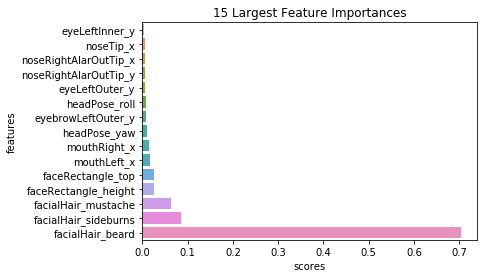

In [33]:
import xgboost as xgb 

model = xgb.XGBClassifier(random_state=1, 
                          learning_rate=0.01,
                          max_depth=3,
                          num_class =2,
                         objective = 'multi:softprob')

model.fit(features, image["gender"])

feat_import = pd.DataFrame({'features': image.columns[2:-1], 
                            'scores': model.feature_importances_})

feat_import = feat_import.sort_values("scores", ascending=True)


sns.barplot(x="scores", y="features", data=feat_import.iloc[48:, :]).set_title('15 Largest Feature Importances')

## 5. Recursive Feature Elimination

In [34]:
X_train = features
y_train = image["gender"]

D_train = xgb.DMatrix(X_train, label=y_train)

In [35]:
# Feature Extraction with RFE
model = xgb.XGBClassifier(random_state=1, 
                          learning_rate=0.01,
                          max_depth=3,
                          num_class =2,
                          objective = 'multi:softprob')
rfe = RFE(model, 10)
fit = rfe.fit(X_train, y_train)

print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Features chosen: {}".format(image.columns.values[2:-1][fit.ranking_]))

Num Features: 10
Selected Features: [False  True False  True False False False False False False  True False
  True False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True False  True]
Features chosen: ['underLipTop_x' 'faceRectangle_height' 'eyebrowLeftOuter_y'
 'faceRectangle_height' 'mouthRight_y' 'mouthRight_x' 'mouthLeft_y'
 'mouthLeft_x' 'pupilLeft_y' 'eyebrowLeftInner_y' 'faceRectangle_height'
 'eyebrowRightInner_x' 'faceRectangle_height' 'eyebrowRightOuter_x'
 'noseTip_y' 'faceRectangle_height' 'eyeRightInner_y' 'eyeRightTop_x'
 'pupilRight_y' 'faceRectangle_height' 'noseTip_x' 'noseRootRight_y'
 'eyeRightTop_y' 'eyeRightBottom_y' 'eyeRightOuter_y' 'pupilRight_x'
 'noseLeftAlarTop_y' 'noseRightAlarTop_y' 'noseLeftAlarOutTip_y'
 'noseRightAlarOutT

In [36]:
print("Features chosen: {}".format(image.columns.values[2:-1][fit.ranking_][:10]))

Features chosen: ['underLipTop_x' 'faceRectangle_height' 'eyebrowLeftOuter_y'
 'faceRectangle_height' 'mouthRight_y' 'mouthRight_x' 'mouthLeft_y'
 'mouthLeft_x' 'pupilLeft_y' 'eyebrowLeftInner_y']


## 6. Forward Feature Selection

In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [38]:
# Build classifier to use in feature selection
model = xgb.XGBClassifier(random_state=1, 
                          learning_rate=0.01,
                          max_depth=3,
                          num_class =2,
                          objective = 'multi:softprob')

# Build step forward feature selection
sfs1 = sfs(model,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  1.7min finished

[2019-11-04 05:15:21] Features: 1/10 -- score: 0.8387818991276497[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:  1.9min finished

[2019-11-04 05:17:16] Features: 2/10 -- score: 0.859628716206277[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  2.1min finished

[2019-11-04 05:19:25] Features: 3/10 -- score: 0.8704955203339587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [39]:
indexes = np.array(list(sfs1.subsets_[10]['feature_names']))
print("Features chosen: {}".format(image.columns.values[2:-1][indexes.astype(np.int)]))

Features chosen: ['faceRectangle_width' 'noseTip_x' 'mouthLeft_y' 'eyebrowLeftOuter_x'
 'eyebrowLeftOuter_y' 'eyeRightOuter_x' 'noseRootLeft_y'
 'facialHair_mustache' 'facialHair_beard' 'facialHair_sideburns']


## 7. Backward Feature Selection

In [ ]:
# Build classifier to use in feature selection
model = xgb.XGBClassifier(random_state=1, 
                          learning_rate=0.01,
                          max_depth=3,
                          num_class =2,
                          objective = 'multi:softprob')

# Build step backward feature selection                          
sfs2 = sfs(model,
           k_features=10,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SBFS
sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed: 16.8min finished

[2019-11-03 09:48:55] Features: 62/10 -- score: 0.8711277112463109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed: 16.3min finished

[2019-11-03 10:05:11] Features: 61/10 -- score: 0.8711277112463109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s


In [ ]:
indexes = np.array(list(sfs2.subsets_[10]['feature_names']))

print(indexes.astype(np.int))
print("Features chosen: {}".format(image.columns.values[2:-1][indexes.astype(np.int)]))